# Бэйзлайн по разработке LGD модели
Loss given default (LGD) объем активов Банка, который будет утерян в случае дефолта клиента, вычисляется как доля от задолженности на момент дефолта

### Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Подгружаем данные

In [56]:
!wget https://raw.githubusercontent.com/BKHV/ds-test/master/LGD-data.csv
df = pd.read_csv('LGD-data.csv', sep=';')

/bin/sh: wget: command not found


### Описание данных

Выборка содержит информацию по 3047 клиентам Банка

In [57]:
df.symbol.nunique()

3047

In [58]:
df.head(3)

,symbol,name,issue_date,EPS,QuoteLast,Price200DayAverage,Price52WeekPercChange,PriceToBook,MarketCap,PE,...,OperatingMargin,NetProfitMarginPercent,NetIncomeGrowthRate5Years,RevenueGrowthRate5Years,RevenueGrowthRate10Years,EPSGrowthRate5Years,EPSGrowthRate10Years,Volume,AverageVolume,LGD
0,GMF,GPT Metro Office Fund,30/11/2014,0.40,0.00,2.33,20.57,1.08,0.0,0.0,...,71.40,149.22,0.0,0.0,0.00,0.0,0.0,0,11201,0.070241
1,WPP,WPP Aunz Ltd,31/01/2011,0.08,1.15,1.08,53.95,1.24,984240000.0,14.3,...,10.89,8.16,0.0,8.9,28.51,0.0,0.0,59930,577967,0.072312
2,MSP,MAXSEC FPO,31/03/2010,0.00,0.03,0.00,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,700000,627885,0.073499


Полный список полей

In [73]:
df.columns

Index(['symbol', 'name', 'issue_date', 'EPS', 'QuoteLast',
       'Price200DayAverage', 'Price52WeekPercChange', 'PriceToBook',
       'MarketCap', 'PE', 'DividendRecentQuarter', 'DividendNextQuarter',
       'DPSRecentYear', 'IAD', 'DividendPerShare', 'DividendYield', 'Dividend',
       'BookValuePerShareYear', 'CashPerShareYear', 'CurrentRatioYear',
       'LTDebtToAssetsYear', 'LTDebtToAssetsQuarter', 'TotalDebtToAssetsYear',
       'TotalDebtToAssetsQuarter', 'LTDebtToEquityYear',
       'LTDebtToEquityQuarter', 'TotalDebtToEquityYear',
       'TotalDebtToEquityQuarter', 'AINTCOV', 'ReturnOnInvestmentTTM',
       'ReturnOnInvestment5Years', 'ReturnOnInvestmentYear',
       'ReturnOnAssetsTTM', 'ReturnOnAssets5Years', 'ReturnOnAssetsYear',
       'ReturnOnEquityTTM', 'ReturnOnEquity5Years', 'ReturnOnEquityYear',
       'Beta', 'Float', 'InstitutionalPercentHeld', 'GrossMargin',
       'EBITDMargin', 'OperatingMargin', 'NetProfitMarginPercent',
       'NetIncomeGrowthRate5Years', 'Re

Выбираем фичи для модели: EPS и MarketCap

In [74]:
X = df[['EPS', 'MarketCap']]
y = (100 * df[['LGD']]).round(1).astype(np.int32)

График распределения фактического LGD

No handles with labels found to put in legend.


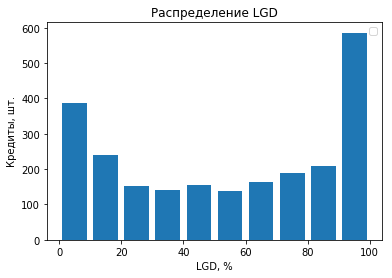

In [70]:
import matplotlib.pyplot as plt
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(y.values, bins, histtype='bar', rwidth=0.8)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Распределение LGD')
plt.legend()
plt.show()

### Обучаем дерево

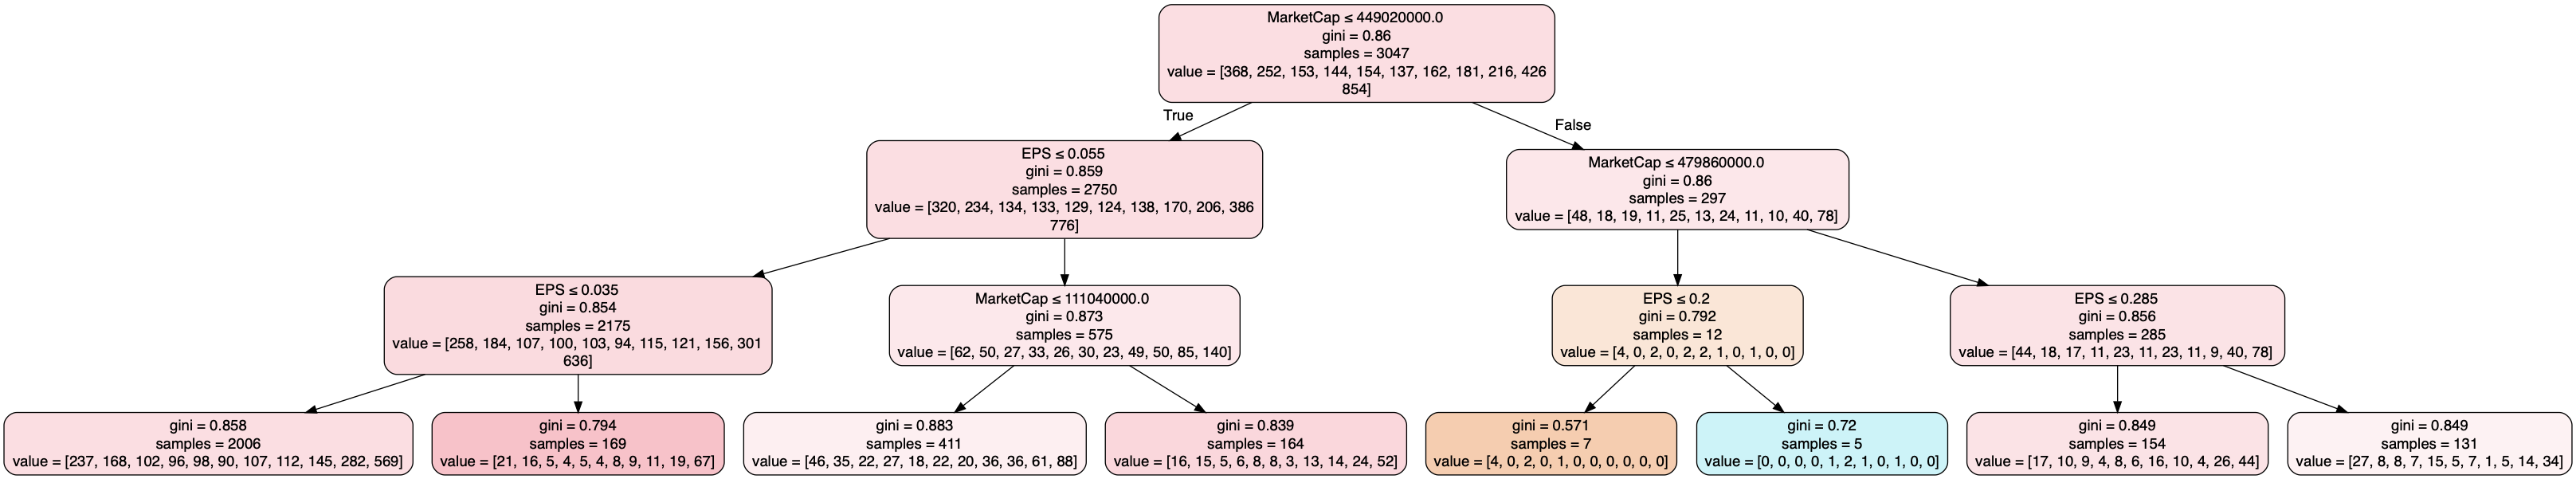

In [64]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=3)
dtree.fit(X,y)
dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data, 
                feature_names = list(X.columns),
                filled = True, 
                rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())